<h1><b>Data Visualization - Venue Dataset</b></h1>

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h5><b>Read Data</b></h5>

In [ ]:
VenueDailyVisitors_df = pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueDailyVisitors.csv')
VenueAge_df=pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueAge.csv')
VenueDistance_df=pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueDistance.csv')
VenueDuration_df=pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueDuration.csv')
VenueGender_df=pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueGender.csv')
VenueSpend_df=pd.read_csv('https://tinyurl.com/ChrisCoDV/001204599/VenueSpend.csv')

<h5><b> 1. Daily Visitor dataframe (one row for each date): </b></h5>

In [ ]:
VenueDailyVisitors_df.head(5)

,Date,UFY,QJL,XFP,WXV,QRY,ZLH,CWN,DKS,XXO,...,AWF,VLS,PXI,YXF,TLJ,TRV,ZFX,GLQ,YDI,XPE
0,2019-01-01,59,202,74,85,265,74,197,217,69,...,166,64,619,85,62,70,67,54,0,66
1,2019-01-02,67,275,67,87,267,57,254,193,87,...,194,68,458,69,74,65,103,65,0,77
2,2019-01-03,66,235,60,111,199,76,208,150,81,...,157,65,304,70,95,76,109,68,0,77
3,2019-01-04,66,244,76,84,193,78,141,129,95,...,89,68,341,87,95,60,89,63,0,72
4,2019-01-05,58,175,75,99,171,78,155,133,107,...,109,66,363,70,53,80,86,58,0,72


<h5><b>2. Summary dataframe (one row for each venue): </b></h5>

In [ ]:
summary = VenueAge_df.merge(VenueDistance_df)
summary = summary.merge(VenueDuration_df)
summary = summary.merge(VenueGender_df)
summary = summary.merge(VenueSpend_df)

In [ ]:
VenueSummary_df= summary
Visitors=VenueDailyVisitors_df.drop('Date',axis='columns')
VenueSummary_df['Total Visitors']= Visitors.sum().values
VenueSummary_df.head()

,Id,Avg age (yrs),Max travel distance (mls),Avg visit duration (mins),Proportion Female (%),Avg spend (£),Total Visitors
0,UFY,48,9,79,45,29,23179
1,QJL,42,25,94,56,25,79390
2,XFP,49,9,97,45,28,25077
3,WXV,55,6,95,48,39,33236
4,QRY,22,29,73,50,9,85249


<h3><b>Discussions</b></h3>

<h5>1. The below plot was drawn to visualize the total number of visitors at each venue.<br><br></h5>
It is an interactive plot which has the following options:<br>
    a. Display the venue Id and percentage as labels.<br>
    b. The camera icon to downloads the screenshot of the plot as a png image.<br>

In [ ]:
df = px.data.tips()
fig = px.pie(df, values=VenueSummary_df['Total Visitors'], names=summary['Id'])
fig.show()

<h5>2. This below visualisation classifies venues based on total volume of visitors as High, Medium, Low.</h5>

Text(0, 0.5, 'Total volume of visitors')

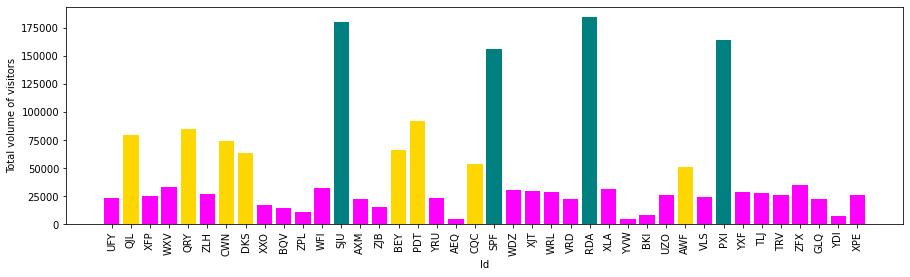

In [ ]:
colors=[]
VenueDailyVisitors_df2=VenueDailyVisitors_df.drop(['Date'],axis='columns')
col = (VenueDailyVisitors_df2.columns)
totalvisitors = VenueDailyVisitors_df2.sum().values

for i in totalvisitors:
    if i>100000:
        color='teal'
    elif i>40000:
        color='gold'
    else:
        color='magenta'
    colors.append(color)

plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
plt.bar(col,totalvisitors,color=colors)
plt.xlabel("Id")
plt.ylabel("Total volume of visitors")

<h5>3. This visualisation shows the range,median of number of visitors in the category 'High'.<br><br></h5>
It is an interactive plot which has the following options:
a. On hovering over the graph the labels display the values.<br>
b. Zoom over a particular area on the graph by drawing bounding boxes. <br>
c. Pan across the plot. <br>
d. Zoom in and zoom out using '+' and '-' signs.<br>
e. Autoscale. <br>
f. Reset the axes back to default scale. <br>
g. The camera icon downloads the screenshot of the plot as a png image.<br>

In [ ]:
selected = ['SJU', 'SPF', 'RDA', 'PXI']

fig = px.box(VenueDailyVisitors_df,y=selected)
fig.update_yaxes(title='Number of visitors')
fig.update_xaxes(title='Id')
fig.show()

<h5>4. The below visualisation is intended to showcase the recently closed and recently opened venues. <br></h5>
It is an interactive plot which has the following options:
a. On hovering over the graph the labels display the values.<br>
b. Zoom over a particular area on the graph by drawing bounding boxes. <br>
c. Pan across the plot. <br>
d. Zoom in and zoom out using '+' and '-' signs.<br>
e. Autoscale. <br>
f. Reset the axes back to default scale. <br>
g. The camera icon downloads the screenshot of the plot as a png image.<br>

In [ ]:
for col in VenueDailyVisitors_df2.columns:
    fig = px.line(VenueDailyVisitors_df, x='Date', y=str(col),title=col+':',width=900, height=300)
    fig.show()

<h5>5.The below visualisation was intended to explore correlations between summary data variables. </h5>

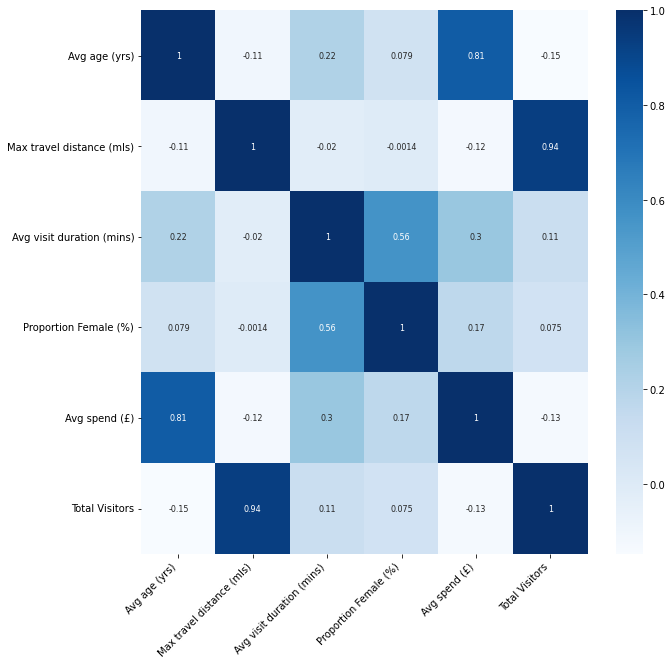

In [ ]:
plt.figure(figsize=(10, 10))
corr=summary.corr()

ax= sns.heatmap(corr,annot=True, annot_kws={"size": 8},cmap='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
plt.show()

<h5>6. The below histogram was intended to distribute the venues into different groups based on their attributes and discover the outliers.</h5>

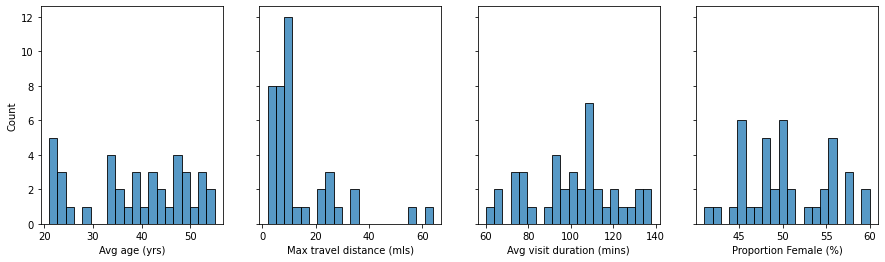

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)
sns.histplot(ax=axes[0],data=VenueSummary_df['Avg age (yrs)'],bins=20)
sns.histplot(ax=axes[1],data=VenueSummary_df['Max travel distance (mls)'],bins=20)
sns.histplot(ax=axes[2],data=VenueSummary_df['Avg visit duration (mins)'],bins=20)
sns.histplot(ax=axes[3],data=VenueSummary_df['Proportion Female (%)'],bins=20)

<h5>7. The below visualisation shows the proportion of female and non-female visitors across all the venues. </h5>

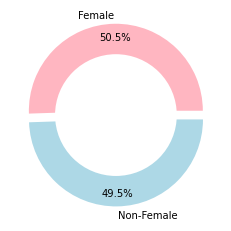

In [ ]:
x=summary['Proportion Female (%)'].sum()/40
y=100-x

proportion=[x,y]
Labels=['Female','Non-Female']
colors = ['#FFB6C1', '#ADD8E6']
explode = (0.05, 0.05)

plt.pie(proportion,colors=colors, labels=Labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

<h5>8. The below visualisation shows the total volume of visitors on different days across all the venues.<br> </h5>
It is an interactive plot which has the following options:
a. On hovering over the graph the labels display the values.<br>
b. Zoom over a particular area on the graph by drawing bounding boxes. <br>
c. Pan across the plot. <br>
d. Zoom in and zoom out using '+' and '-' signs.<br>
e. Autoscale. <br>
f. Reset the axes back to default scale. <br>
g. The camera icon downloads the screenshot of the plot as a png image.<br>
h. The box select and Lasso select lets the user to select and highlight only certain datapoints.<br>

In [ ]:
a=VenueDailyVisitors_df.drop('Date',axis='columns')
b=a.T
c=b.sum().values
VenueDailyVisitors_df['Total Visitors']=c
DateTotal=VenueDailyVisitors_df[['Date','Total Visitors']]
DateTotal
fig = px.bar(DateTotal, x='Date', y='Total Visitors')
fig.show()

<h5>9. The below visualization tries to compare the total volume of visitors on two specific days, but the result of this graph is not satisified and concluding anything with this visualization is difficult.<br> </h5>

5552 5551


<function matplotlib.pyplot.show>

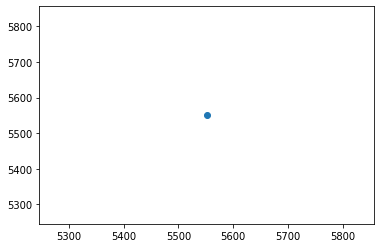

In [ ]:
a = VenueDailyVisitors_df.iloc[:2]
x=a['Total Visitors'].iloc[0]
y=a['Total Visitors'].iloc[1]

print(x,y)
plt.scatter(x,y)
plt.show